# ADTA 5560: Recurrent Neural Networks for Sequence Data
Thuan L Nguyen, PhD

# Final Project by Yog Chaudhary 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# For timeseries RNN LSTM neural networks

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

2024-12-07 21:11:38.171039: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-12-07 21:11:38.171077: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

### Load Dataset

In [4]:
# Load dataset lousding FB

df_ALL = pd.read_csv("FB.csv")

In [5]:
df_ALL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


### Brief Exploratory Data Analysis (EDA)

In [6]:
df_ALL.shape

(1980, 7)

In [7]:
df_ALL.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
# Statistics Sumary

df_ALL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1.980000e+03
mean,112.285808,113.508752,111.011495,112.312207,112.312207,3.301999e+07
std,58.080987,58.584028,57.575041,58.133793,58.133793,2.959716e+07
min,18.080000,18.270000,17.549999,17.730000,17.730000,5.913100e+06
25%,64.647497,65.575001,63.817501,64.762499,64.762499,1.616085e+07
50%,113.810001,114.654999,112.945000,113.810001,113.810001,2.405750e+07
75%,167.852505,169.492496,166.022499,168.085003,168.085003,3.986862e+07
max,222.570007,224.199997,221.279999,223.229996,223.229996,5.735764e+08


### Keep Only "Close" (for Closing Price) and Filter out all other attributes
notes: the research focuses only on the closing price

In [9]:
# Out of 7 columns consider only one column

df = df_ALL[[ 'Close']]

In [10]:
df.head()

,Close
0,38.230000
1,34.029999
2,31.000000
3,32.000000
4,33.029999


<AxesSubplot:>

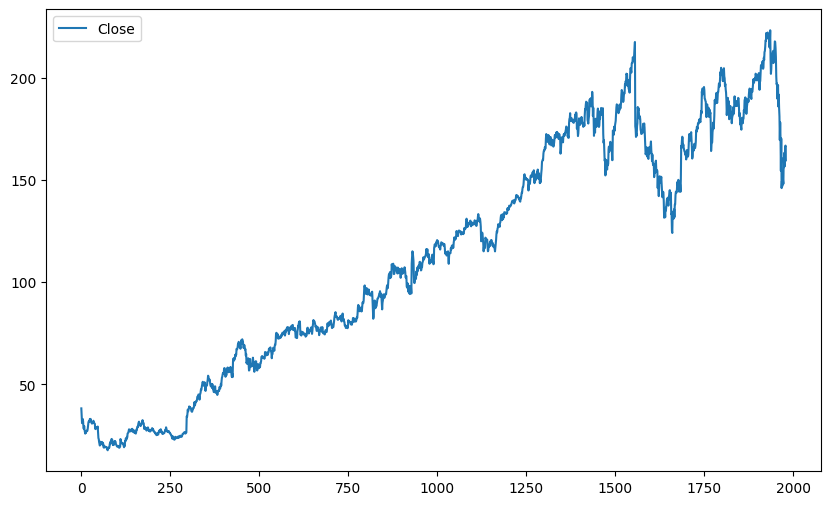

In [11]:
df.plot(figsize=(10, 6))

### Length of Input Time Series-Number of Input Time Steps

In [12]:
length60 = 60

In [13]:
length60

60

### Time Series Dataset: Train / test Split

In [14]:
len(df)

1980

In [15]:
test_precent = 0.1

In [16]:
len(df)*test_precent

198.0

### Split Data-->Train / test

In [17]:
test_length = np.round(len(df)*test_precent)
test_length

198.0

In [18]:
split_index = int(len(df) - test_length)
split_index

1782

In [19]:
data_train = df.iloc[: split_index]
data_test = df.iloc[split_index - length60 :]

In [20]:
data_train.head(5)

,Close
0,38.230000
1,34.029999
2,31.000000
3,32.000000
4,33.029999


In [21]:
data_train.tail()

,Close
1777,177.470001
1778,181.330002
1779,189.009995
1780,188.470001
1781,187.479996


In [22]:
data_test.head(5)

,Close
1722,167.679993
1723,165.869995
1724,165.550003
1725,166.690002
1726,168.699997


In [23]:
data_test.tail()

,Close
1975,163.339996
1976,156.789993
1977,165.949997
1978,166.800003
1979,159.600006


### Normalize Data (Scale it into the range[0, 1])

In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(data_train)

MinMaxScaler()

In [26]:
normalized_train = scaler.transform(data_train)
normalized_test = scaler.transform(data_test)

### Create TimeseriesGenerator for Training

In [27]:
batch_size32 = 32
train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)

In [28]:
len(normalized_train)

1782

In [29]:
len(train_tsGenerator60)

54

In [30]:
x,y = train_tsGenerator60[0]

In [31]:
# print(x)

In [32]:
# print(y)

### Bulid, Train, and Test Model

#### Bulid LSTM Model

In [33]:
n_features = 1

In [34]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length60, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(1))

2024-12-07 21:11:40.654242: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-12-07 21:11:40.654284: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-12-07 21:11:40.654310: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tf2-keras-ann-vm): /proc/driver/nvidia/version does not exist
2024-12-07 21:11:40.654701: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compile Model

In [35]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-traina

Train (Fit) Model Using fit_generator()

In [36]:
model.fit_generator(train_tsGenerator60, epochs=100)

Epoch 1/100


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


54/54 [==============================] - 7s 77ms/step - loss: 0.0851
Epoch 2/100
54/54 [==============================] - 4s 79ms/step - loss: 0.0085
Epoch 3/100
54/54 [==============================] - 4s 77ms/step - loss: 0.0085
Epoch 4/100
54/54 [==============================] - 4s 78ms/step - loss: 0.0040
Epoch 5/100
54/54 [==============================] - 6s 107ms/step - loss: 0.0032
Epoch 6/100
54/54 [==============================] - 4s 78ms/step - loss: 0.0029
Epoch 7/100
54/54 [==============================] - 4s 80ms/step - loss: 0.0018
Epoch 8/100
54/54 [==============================] - 4s 78ms/step - loss: 0.0022
Epoch 9/100
54/54 [==============================] - 4s 79ms/step - loss: 0.0018
Epoch 10/100
54/54 [==============================] - 4s 77ms/step - loss: 0.0017
Epoch 11/100
54/54 [==============================] - 4s 78ms/step - loss: 0.0022
Epoch 12/100
54/54 [==============================] - 4s 77ms/step - loss: 0.0019
Epoch 13/100
54/54 [================

### Visualize Model's Performance after Training

In [37]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<AxesSubplot:>

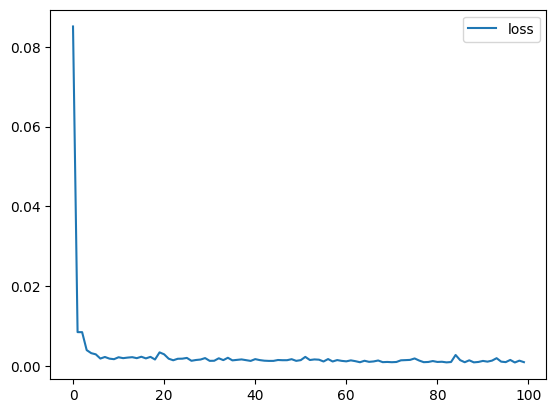

In [38]:
df_model_loss = pd.DataFrame(model.history.history)
df_model_loss.plot()

### Prediciton for Testing: Using TimeseriesGenerator
#### Create TimeseriesGenerator for Tesing

In [39]:
batch_size1 = 1
test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=length60, batch_size=batch_size1)

### predict Future Data Points for Testing

In [40]:
normalized_prediction = model.predict(test_tsGenerator60) 

In [41]:
normalized_prediction

array([[0.78155917],
       [0.7897676 ],
       [0.79825497],
       [0.80676043],
       [0.81427777],
       [0.82029104],
       [0.82501644],
       [0.82915753],
       [0.83287716],
       [0.8365182 ],
       [0.8404109 ],
       [0.84431285],
       [0.84790486],
       [0.8515731 ],
       [0.85571325],
       [0.8599799 ],
       [0.864597  ],
       [0.8692253 ],
       [0.8736024 ],
       [0.87719274],
       [0.879715  ],
       [0.8808232 ],
       [0.88134193],
       [0.8815879 ],
       [0.88210106],
       [0.8823118 ],
       [0.882003  ],
       [0.88061583],
       [0.8784772 ],
       [0.87545985],
       [0.8716293 ],
       [0.86674476],
       [0.8600044 ],
       [0.85230845],
       [0.8444703 ],
       [0.8378601 ],
       [0.83252156],
       [0.8280677 ],
       [0.8248621 ],
       [0.82146853],
       [0.8181253 ],
       [0.815141  ],
       [0.813035  ],
       [0.8114941 ],
       [0.8103469 ],
       [0.8092565 ],
       [0.80746555],
       [0.805

In [42]:
len(normalized_prediction)

198

In [43]:
# convert normalized predictions back to the true values

prediction = scaler.inverse_transform(normalized_prediction)

In [44]:
prediction_index = np.arange(1979, 2054, step=1)

df_prediction = pd.DataFrame(data=prediction, columns=['Prediction'])

In [45]:
df_prediction

,Prediction
0,173.862076
1,175.501877
2,177.197403
3,178.896530
4,180.398270
...,...
193,153.521591
194,152.720245
195,152.421494
196,152.731339


### Visualize Prediction

<AxesSubplot:>

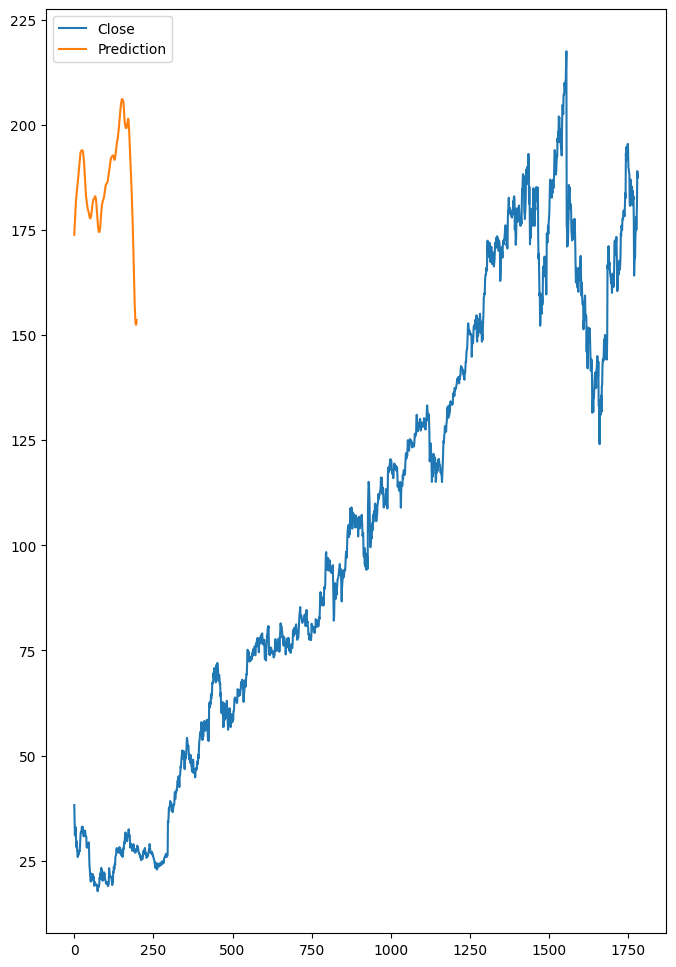

In [46]:
ax = data_train.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

### Visualize Prediction and compare actual close price

<AxesSubplot:>

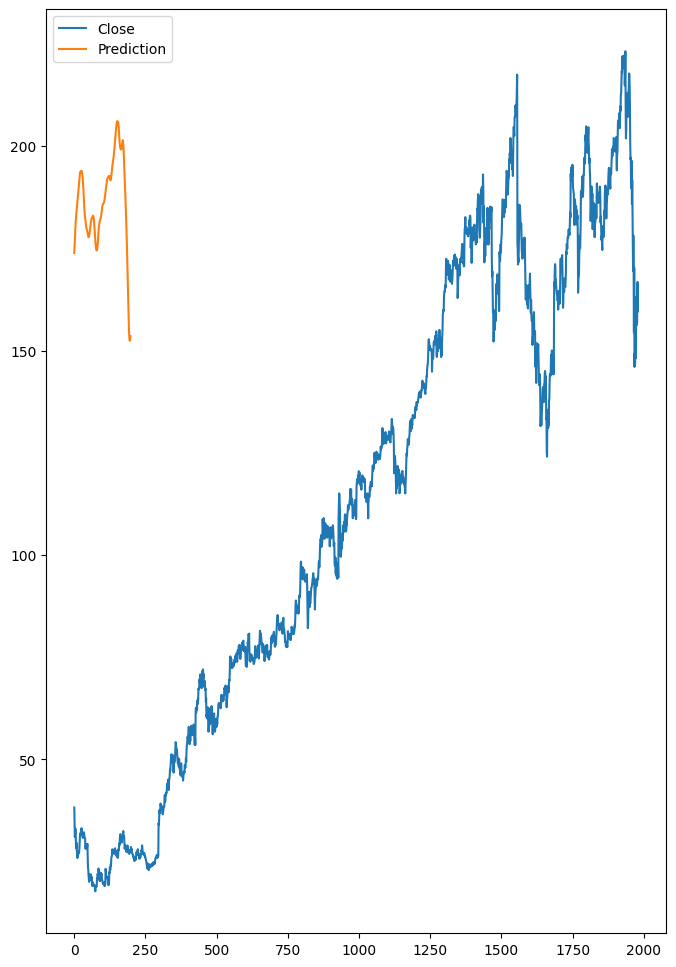

In [47]:
ax = df.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

# Time Series Forecasting with LSTM

# Overview


### Time Series forecasting:


###  Forecast into the "Future" or unknown range


###  Should employ all the available data


### NOt spilt the data into training/testing

# PreProcess Full Input Dataset

In [48]:
# Still use Minmax Scaler to normalize the full input dataset

full_scaler = MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)

# Create TimeSeriesGenerator for Forecasting

In [49]:
# Number of time steps of the input time series
# still use length60:

length60

60

In [50]:
# create timeseries Generator for forecasting

forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length60, batch_size=batch_size32)


# Build, Compile, and Fit LSTM model for Forecasting

In [51]:
# Train/Fit LSTM model
# In forecasting, we don't validate, only FORECAST
# So, not need EarlyStop: Not need validation_generator

model.fit_generator(forecast_tsGenerator, epochs = 40)

Epoch 1/40
 1/60 [..............................] - ETA: 5s - loss: 0.0011

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


60/60 [==============================] - 5s 77ms/step - loss: 0.0010
Epoch 2/40
60/60 [==============================] - 5s 77ms/step - loss: 9.7201e-04
Epoch 3/40
60/60 [==============================] - 5s 77ms/step - loss: 0.0014
Epoch 4/40
60/60 [==============================] - 5s 78ms/step - loss: 0.0011
Epoch 5/40
60/60 [==============================] - 5s 77ms/step - loss: 0.0011
Epoch 6/40
60/60 [==============================] - 5s 77ms/step - loss: 9.3606e-04
Epoch 7/40
60/60 [==============================] - 5s 77ms/step - loss: 0.0010
Epoch 8/40
60/60 [==============================] - 5s 77ms/step - loss: 0.0017
Epoch 9/40
60/60 [==============================] - 5s 77ms/step - loss: 9.5890e-04
Epoch 10/40
60/60 [==============================] - 5s 77ms/step - loss: 0.0012
Epoch 11/40
60/60 [==============================] - 5s 78ms/step - loss: 9.3137e-04
Epoch 12/40
60/60 [==============================] - 6s 104ms/step - loss: 0.0014
Epoch 13/40
60/60 [============

# Time Series Forecasting Using LSTM Neural Network

In [52]:
forecast = []
# Set periods with the time span of forecasting
# Let's forecast for the next 500 business days 

periods = 500

first_eval_batch = normalized_full_data[-length60:]
current_batch = first_eval_batch.reshape((1, length60, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)
    


# Inverse to Transform Normalized Data Back into True Values

In [53]:
forecast = full_scaler.inverse_transform(forecast)

forecast

array([[150.15548332],
       [150.44804482],
       [149.79423081],
       [148.51675923],
       [146.9060358 ],
       [145.13943471],
       [143.31531348],
       [141.48808107],
       [139.68546865],
       [137.92250544],
       [136.2105583 ],
       [134.55375505],
       [132.95125053],
       [131.40001929],
       [129.89691341],
       [128.43793979],
       [127.01850515],
       [125.63641697],
       [124.28638377],
       [122.96567409],
       [121.67170344],
       [120.40161786],
       [119.15261851],
       [117.92387247],
       [116.71421612],
       [115.52184277],
       [114.34494571],
       [113.18273491],
       [112.0373049 ],
       [110.91297337],
       [109.81365993],
       [108.74129986],
       [107.69611978],
       [106.67702955],
       [105.68312888],
       [104.71359099],
       [103.76644994],
       [102.83968469],
       [101.93142732],
       [101.04157369],
       [100.16826201],
       [ 99.31001017],
       [ 98.46651808],
       [ 97

In [54]:
df

,Close
0,38.230000
1,34.029999
2,31.000000
3,32.000000
4,33.029999
...,...
1975,163.339996
1976,156.789993
1977,165.949997
1978,166.800003


# Creating new time stamp index with pandas: 01/01/2017-12/24/2017 

In [55]:
#calculate forecast index

forecast_index = np.arange(1980,2480,step=1)

In [56]:
forecast_df=pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

In [57]:
forecast_df

,Forecast
1980,150.155483
1981,150.448045
1982,149.794231
1983,148.516759
1984,146.906036
...,...
2475,51.277886
2476,51.263684
2477,51.249576
2478,51.235564


<AxesSubplot:>

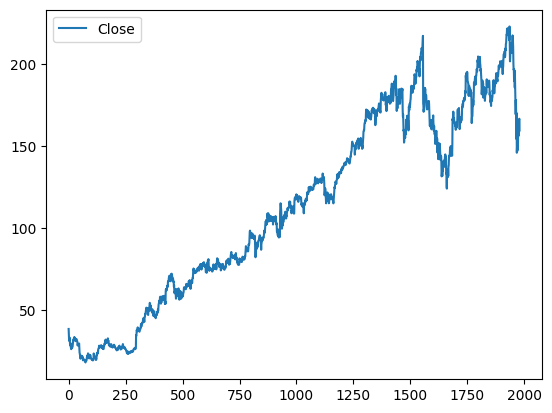

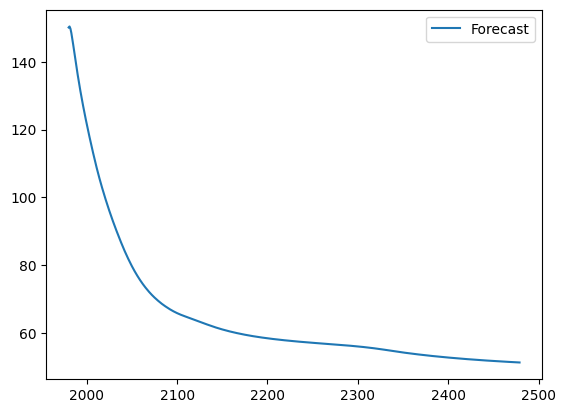

In [58]:
df.plot()
forecast_df.plot()

<AxesSubplot:>

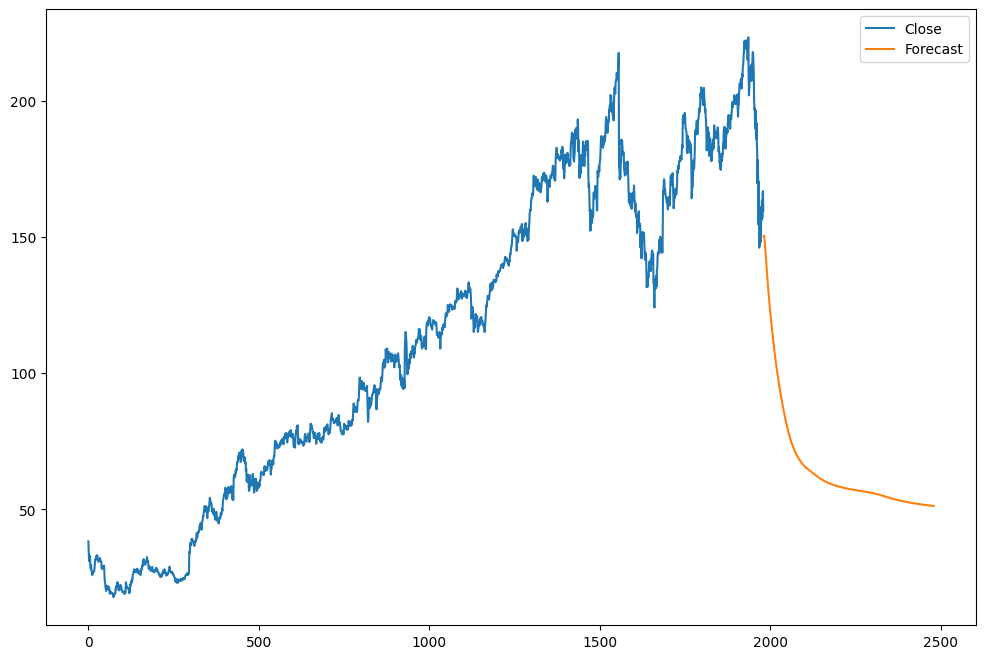

In [59]:
ax=df.plot()
forecast_df.plot(ax=ax, figsize=(12,8))

In [60]:
# Thank You 